In [138]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
os.chdir('D:/LY/parttime/house/hous/')

In [371]:
# read train set
train_Df = pd.read_csv('train.csv')
print(train_Df.shape)
# research description of variables
des = open("data_description.txt", "r")
data_explain = des.readlines()
des.close()
regex=re.compile('^[a-zA-Z]')
exp_list = [re.match(regex, i) for i in data_explain]
exp_indx = np.asarray(np.where([type(i) == type(exp_list[0]) for i in exp_list]))[0]
exp_col = np.array(data_explain)[exp_indx.astype(int)]
#print(exp_col)
# make a copy of train_Df
modfy_Df1 = train_Df.copy()
test = pd.read_csv('test.csv')
prc = pd.read_csv('sample_submission.csv')
test = test.merge(prc, on='Id', how='left')
modfy_Df = modfy_Df1.append(test)

(1460, 81)


In [372]:
exp_df = pd.DataFrame(exp_col)
exp_df.columns = ['v']
exp_df = pd.DataFrame(exp_df.v.str.split(':',1).tolist(),
                                 columns = ['var','mean'])
exp_df.head()

,var,mean
0,MSSubClass,Identifies the type of dwelling involved in t...
1,MSZoning,Identifies the general zoning classification ...
2,LotFrontage,Linear feet of street connected to property\n
3,LotArea,Lot size in square feet\n
4,Street,Type of road access to property\n


In [373]:
# Drop variable which includes more than 100 NA 
Na_idx = np.where(modfy_Df.isnull().sum()>100)
Na_col = modfy_Df.columns[Na_idx]
for i in Na_col:
    modfy_Df = modfy_Df.drop(i, axis=1)
    print(modfy_Df.shape)
# drop row with NA values
modfy_Df = modfy_Df.dropna()
modfy_Df.shape

(2919, 80)
(2919, 79)
(2919, 78)
(2919, 77)
(2919, 76)
(2919, 75)
(2919, 74)
(2919, 73)
(2919, 72)
(2919, 71)
(2919, 70)


(2799, 70)

In [374]:
# transfer Catl.vars to numeric
cat_df = modfy_Df.select_dtypes(include=['object']).copy()
cat_df = pd.DataFrame()
for i in range(cat_df.shape[1]):
    newname = cat_df.columns[i]
    cat_df[newname] = cat_df[catlg_df.columns[i]].astype('category')
    cat_df[newname] = cat_df[newname].cat.codes
    

In [375]:
import math

In [376]:
num_df = modfy_Df._get_numeric_data()
lg_df = pd.DataFrame()
num_cat_df = pd.DataFrame()
for i in num_df.columns:
    if len(num_df[i].unique())>16:
        lg_df[i] = np.log2(num_df[i])
        for j in lg_df[i]:
            if math.isinf(j):
                lg_df[i] = num_df[i]
                
    else:
        num_cat_df[i] = num_df[i].astype('category').cat.codes
    


d:\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [377]:
new_df1 = pd.concat([lg_df, cat_df, num_cat_df], axis=1)

In [378]:
new_df1.head(1)

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,0.0,13.044736,10.967947,10.967947,196.0,706.0,0.0,150.0,9.741467,9.741467,...,2,1,3,1,5,0,2,0,1,2


In [354]:
old_col =['Id', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
for i in old_col:
    new_df1[i] = modfy_Df[i]

In [355]:
new_df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,YrSold
0,13.044736,2003,2003,196.0,706,0,150,9.741467,9.741467,854,...,0,2,1,3,0,5,0,1,0,2
1,13.228819,1976,1976,0.0,978,0,284,10.301496,10.301496,0,...,1,2,0,3,0,3,1,1,0,1
2,13.457637,2001,2002,162.0,486,0,434,9.845490,9.845490,866,...,0,2,1,3,0,3,1,1,0,2
3,13.221285,1915,1970,0.0,216,0,540,9.562242,9.908393,756,...,0,1,0,3,0,4,1,2,0,0
4,13.799686,2000,2000,350.0,655,0,490,10.161132,10.161132,1053,...,0,2,1,4,0,6,1,2,0,2


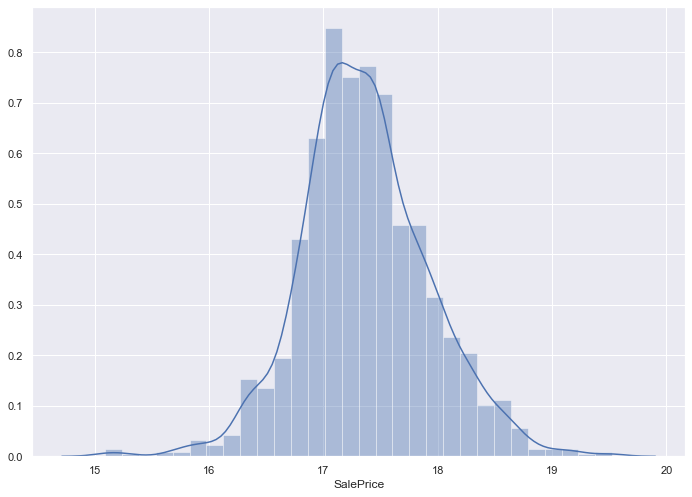

In [380]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(new_df1.SalePrice[0:1460], bins=30)

plt.show()

In [381]:
#

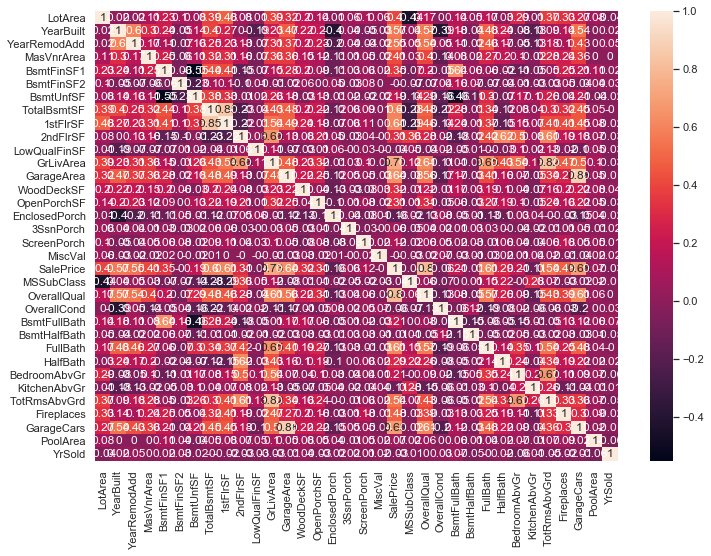

In [382]:
new_df = new_df1.drop(['Id','MoSold', 'MoSold'], axis=1)
new_df2 = new_df.head(1460)
cor_matrix = new_df2.corr().round(2)
sns.heatmap(data=cor_matrix, annot=True)

In [383]:
abs(cor_matrix['SalePrice'])

LotArea          0.40
YearBuilt        0.57
YearRemodAdd     0.55
MasVnrArea       0.41
BsmtFinSF1       0.35
BsmtFinSF2       0.00
BsmtUnfSF        0.19
TotalBsmtSF      0.60
1stFlrSF         0.61
2ndFlrSF         0.31
LowQualFinSF     0.04
GrLivArea        0.73
GarageArea       0.64
WoodDeckSF       0.32
OpenPorchSF      0.31
EnclosedPorch    0.16
3SsnPorch        0.06
ScreenPorch      0.12
MiscVal          0.00
SalePrice        1.00
MSSubClass       0.04
OverallQual      0.80
OverallCond      0.06
BsmtFullBath     0.21
BsmtHalfBath     0.01
FullBath         0.61
HalfBath         0.29
BedroomAbvGr     0.21
KitchenAbvGr     0.11
TotRmsAbvGrd     0.54
Fireplaces       0.48
GarageCars       0.68
PoolArea         0.07
YrSold           0.03
Name: SalePrice, dtype: float64

In [402]:
(abs(cor_matrix['SalePrice'])).rank()
cor_matrix['abs'] = abs(cor_matrix['SalePrice'])
finl_data_indce = np.array(cor_matrix.sort_values(by= ['abs']).tail(10).index.tolist())
finl_data_indce
#final_data = new_df.iloc[:,finl_data_indce]
new_df.columns[0] == finl_data_indce[0]
finl_data_indce
f_df = new_df[finl_data_indce]
data_final = f_df

In [403]:
X = data_final.loc[:, data_final.columns != 'SalePrice']
y = data_final.loc[:, data_final.columns == 'SalePrice']

In [386]:
from imblearn.over_sampling import SMOTE

In [ ]:
os = SMOTE(random_state=0)

In [ ]:
X_train, X_test, y_train, y_test

In [399]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [462]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [394]:
y_train = y.head(1460)
y_test = y[1461:]

In [391]:
columns = X_train.columns

In [395]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [461]:
#

In [384]:
data_final = new_df

In [329]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

array(['TotalBsmtSF', '1stFlrSF', 'GarageArea', 'BsmtQual_cat',
       'KitchenQual_cat', 'GarageCars', 'ExterQual_cat', 'GrLivArea',
       'OverallQual', 'SalePrice'], dtype=object)

In [332]:
X = f_df.loc[:, f_df.columns != 'SalePrice']

In [446]:
y = f_df.loc[:, f_df.columns == 'SalePrice']
y = y['SalePrice'].values.tolist()
for i in range(len(y)):
    if y[i] > np.mean(y):
        y[i] = 0
    else:
        y[i] = 1

In [447]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.070877
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.124     
Dependent Variable: y                AIC:              414.7668  
Date:               2020-05-18 23:50 BIC:              468.2000  
No. Observations:   2799             Log-Likelihood:   -198.38   
Df Model:           8                LL-Null:          -226.38   
Df Residuals:       2790             LLR p-value:      2.8377e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
YearRemodAdd     11.5061   7.6055  1.5129 0.1303  -3.4003 26.4126
YearBuilt       -10.6945   7.6163 -1.4042 0.1603 -25.6222  4.2331

In [450]:
y = pd.DataFrame(y)
y_train = y.head(1460)
y_test = y[1461:]
X_train = X.head(1460)
X_test = X[1461:]


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [452]:
y_pred = logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [460]:
#

In [453]:
#

In [335]:
#


In [454]:
#

In [456]:
#

In [455]:
#

In [459]:
#

In [457]:
#

In [458]:
#